In [78]:
import json 
import glob
import itertools
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 150

import seaborn as sns 
sns.set_theme()
sns.set_style(style = "ticks")
sns.set_color_codes("colorblind")

import numpy as np
import csv
matplotlib.rcParams['font.size'] = 8


In [2]:
path = '../data/yarr_test_03_25_20/000083_std_digitalscan/'
#file = 'std_digitalscan.json'
file = 'JohnDoe_0_OccupancyMap.json'

json_file= path+file

with open(json_file) as f:
    my_json = json.load(f) # Open json
    print(my_json.keys())

my_json['Data']
    
    

dict_keys(['Data', 'Name', 'Overflow', 'Type', 'Underflow', 'x', 'y', 'z'])


[[100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
 

In [3]:
# #plt.imshow(my_json['Data'], interpolation='none')

# fig = plt.figure(figsize=(6, 6))

# ax = fig.add_subplot(111)
# #ax.set_title('colorMap')
# plt.imshow(my_json['Data'])
# ax.set_aspect('equal')

# cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
# cax.get_xaxis().set_visible(False)
# cax.get_yaxis().set_visible(False)
# cax.patch.set_alpha(0)
# cax.set_frame_on(False)
# plt.colorbar(orientation='vertical')
# plt.show()

Text(64.375, 0.5, 'Row')

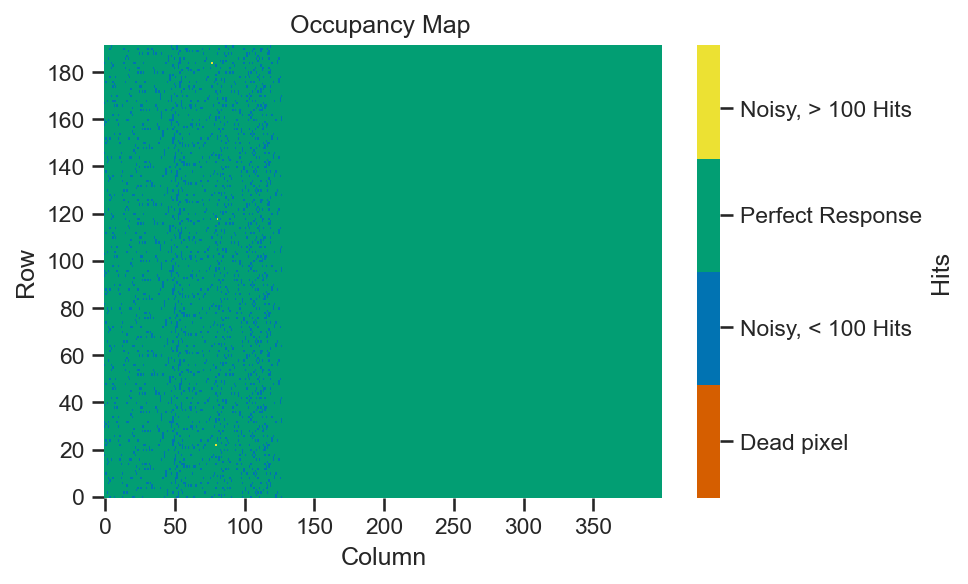

In [79]:
# Choose colormap
cmap = plt.cm.Spectral_r

# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))

# Define the alphas in the range from 0 to 1
alphas = np.ones(cmap.N)*0.85 #np.linspace(0, 1, cmap.N)
# Define the background as white
BG = np.asarray([1., 1., 1.,])
# Mix the colors with the background
for i in range(cmap.N):
    my_cmap[i,:-1] = my_cmap[i,:-1] * alphas[i] + BG * (1.-alphas[i])

# Create new colormap
my_cmap = matplotlib.colors.ListedColormap(my_cmap)

my_cmap_2 = matplotlib.colors.ListedColormap(['r','b','g','y'])#['green','red','black','yellow'])
bounds=[-1, 0.0, 99, 101, 1000.0]
# <= 0 dead pixel
# < 
norm = matplotlib.colors.BoundaryNorm(bounds, 4)


# Plot single occupancy map 
ax = sns.heatmap(np.array(my_json['Data']).T,
                 xticklabels=50,
                 yticklabels=20, cmap=my_cmap_2,#"Spectral_r",
                 norm = norm,
                 cbar_kws={'label': 'Hits'})


cbar = ax.collections[0].colorbar
cbar.set_ticks([-.5, 50, 100, 500])
#cbar.set_ticklabels(['0 Hits', '< 100 Hits', '100 Hits', ' > 100 Hits'])
cbar.set_ticklabels(['Dead pixel', 'Noisy, < 100 Hits', 'Perfect Response', 'Noisy, > 100 Hits'])

ax.invert_yaxis()
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.title("Occupancy Map ")
plt.xlabel("Column")
plt.ylabel("Row")



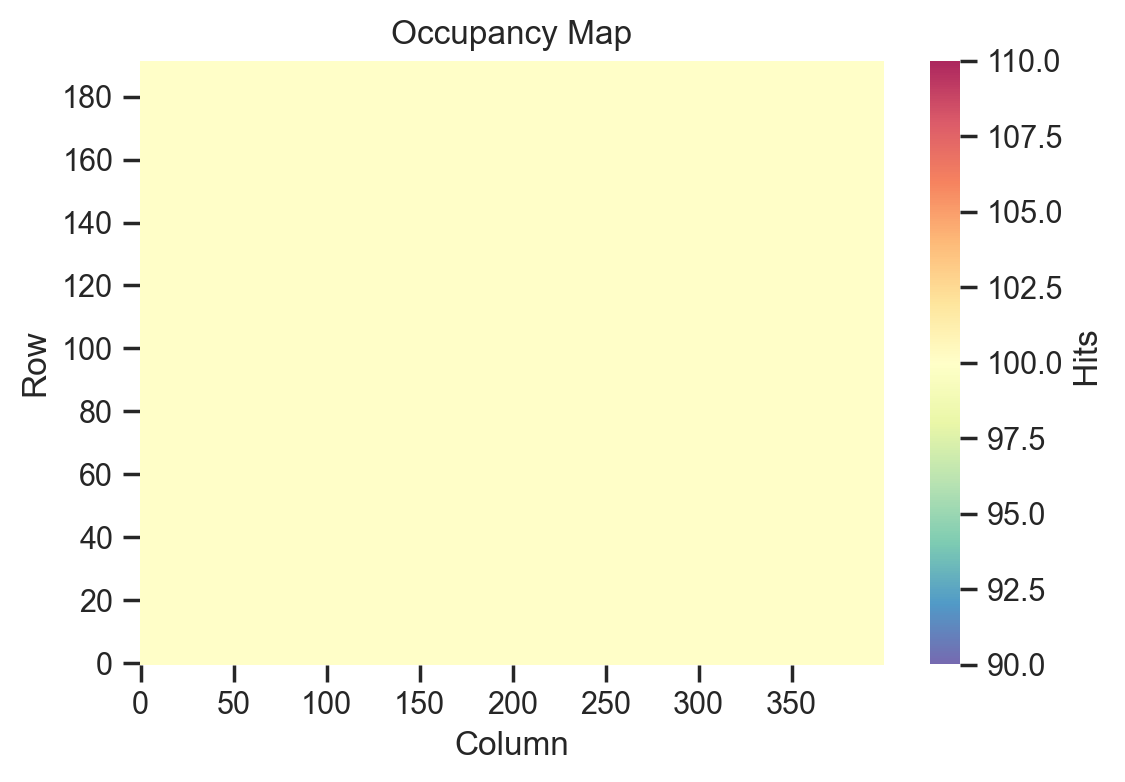

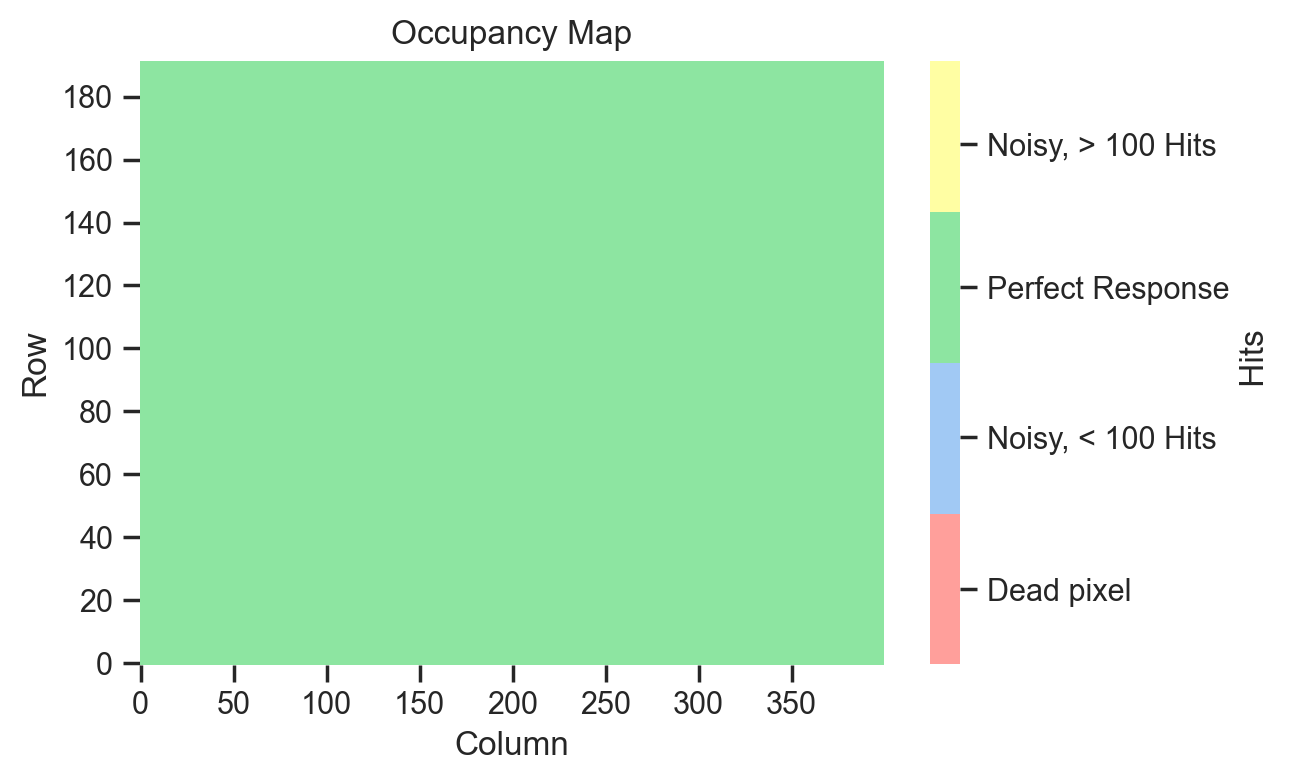

In [42]:
def plot_occupancy_map(data,title="Occupancy Map", cbar_title="",new_fig=True):
    if new_fig:
        plt.figure(dpi=200)
    if "Mean" in cbar_title:
        vmin = 0
        vmax = 600
    elif "Standard" in cbar_title:
        vmin = 0
        vmax = 80
    else:
        vmin =None
        vmax = None
    # Choose colormap
    cmap = plt.cm.Spectral_r

    # Get the colormap colors
    my_cmap = cmap(np.arange(cmap.N))
    
    
    
    # Define the alphas in the range from 0 to 1
    alphas = np.ones(cmap.N)*0.85 #np.linspace(0, 1, cmap.N)
    # Define the background as white
    BG = np.asarray([1., 1., 1.,])
    # Mix the colors with the background
    for i in range(cmap.N):
        my_cmap[i,:-1] = my_cmap[i,:-1] * alphas[i] + BG * (1.-alphas[i])

    # Create new colormap
    my_cmap = matplotlib.colors.ListedColormap(my_cmap)
    
    ax = sns.heatmap(np.array(data).T,
                 xticklabels=50,
                 yticklabels=20, cmap=my_cmap,
                 vmin=vmin, vmax=vmax,
                 cbar_kws={'label': cbar_title+' Hits'})

    ax.invert_yaxis()
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.title(title)
    plt.xlabel("Column")
    plt.ylabel("Row")
    
    return 

def plot_classified_occupancy_map(data,title="Occupancy Map", cbar_title="",new_fig=True):
    if new_fig:
        plt.figure(dpi=200)
    if "Mean" in cbar_title:
        vmin = 0
        vmax = 600
    elif "Standard" in cbar_title:
        vmin = 0
        vmax = 80
    else:
        vmin =None
        vmax = None
    my_cmap_2 = matplotlib.colors.ListedColormap(['r','b','g','y'])#['green','red','black','yellow'])
    bounds=[-1, 0.0, 99, 101, 1000.0]
 
    norm = matplotlib.colors.BoundaryNorm(bounds, 4)
    ax = sns.heatmap(np.array(data).T,
                 xticklabels=50,
                 yticklabels=20, cmap=my_cmap_2,
                 #vmin=-1, vmax=1000,
                 norm=norm,
                 cbar_kws={'label': cbar_title+' Hits'})
    
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([-.5, 50, 100, 500])
    #cbar.set_ticklabels(['0 Hits', '< 100 Hits', '100 Hits', ' > 100 Hits'])
    cbar.set_ticklabels(['Dead pixel', 'Noisy, < 100 Hits', 'Perfect Response', 'Noisy, > 100 Hits'])

    ax.invert_yaxis()
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.title(title)
    plt.xlabel("Column")
    plt.ylabel("Row")
    
    return 


def plot_hits_1d(data,label,color="None",title=""):
    nbins = 50
    my_range = (0,600)
    plt.hist(data,range=my_range,bins=nbins,alpha=0.8,label=label,color=color)
    plt.yscale('log')
    plt.ylabel("Number of Pixels")
    plt.xlabel("Number of Hits")
    plt.legend(frameon=False)
    plt.title(title)
    return

def plot_hists_by_fe(my_data, readout, scan_name,n_repeat):
    palette = itertools.cycle(sns.color_palette())
    title = readout+", "+scan_name+", "+str(n_repeat)+"x"
    # number of columns per type: synch = 128, lin = 136, diff = 136
    #plt.figure()
    plt.figure(figsize=(12, 3), dpi=300)
    plt.subplot(1,3,3)
    plot_hits_1d(my_data[264:400,:,0:n_repeat].flatten(),"Diff",color=next(palette),title=title)
    plt.subplot(1,3,1)
    plot_hits_1d(my_data[0:128,:,0:n_repeat].flatten(),label="Synch",color=next(palette),title=title)
    plt.subplot(1,3,2)
    plot_hits_1d(my_data[128:264,:,0:n_repeat].flatten(),label="Lin",color=next(palette),title=title)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    return

plot_occupancy_map(my_json["Data"])
plot_classified_occupancy_map(my_json["Data"])



## Read RCE Data

Comes in .dat file delimited by spaces 

In [46]:
def read_dat(fname):
    "Read rce data, .dat file, delimited by spaces"
    data = []
    with open(fname) as f:
        reader = csv.reader(f, delimiter="\n")
        i = 0
        for line in reader:
            #print(line)
            values = []
            if i >= 8:
                #print(line[0].split(" "))#[0:10])
                x = line[0].split(" ")
                for i in range(len(x)-1):
                    values += [int(x[i])]

                data += [values]
                #for val in line:
                #    print(len(val))

            #else:
            #    print(line)
            i += 1
    return np.array(data).T


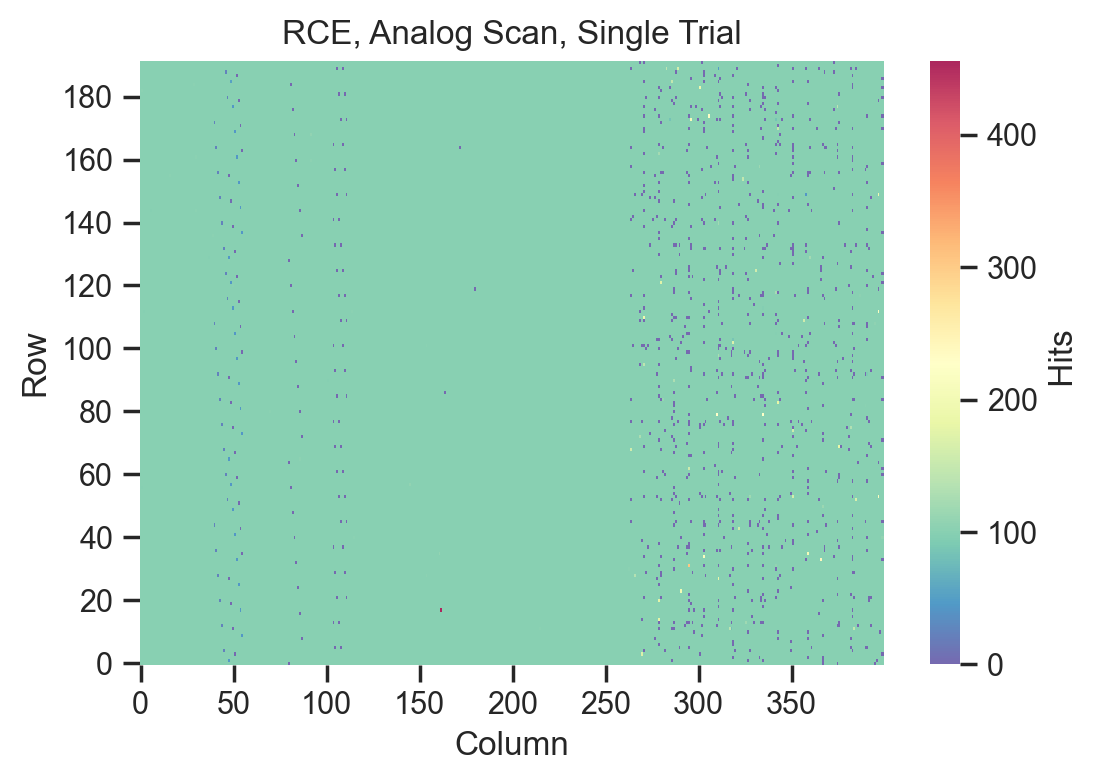

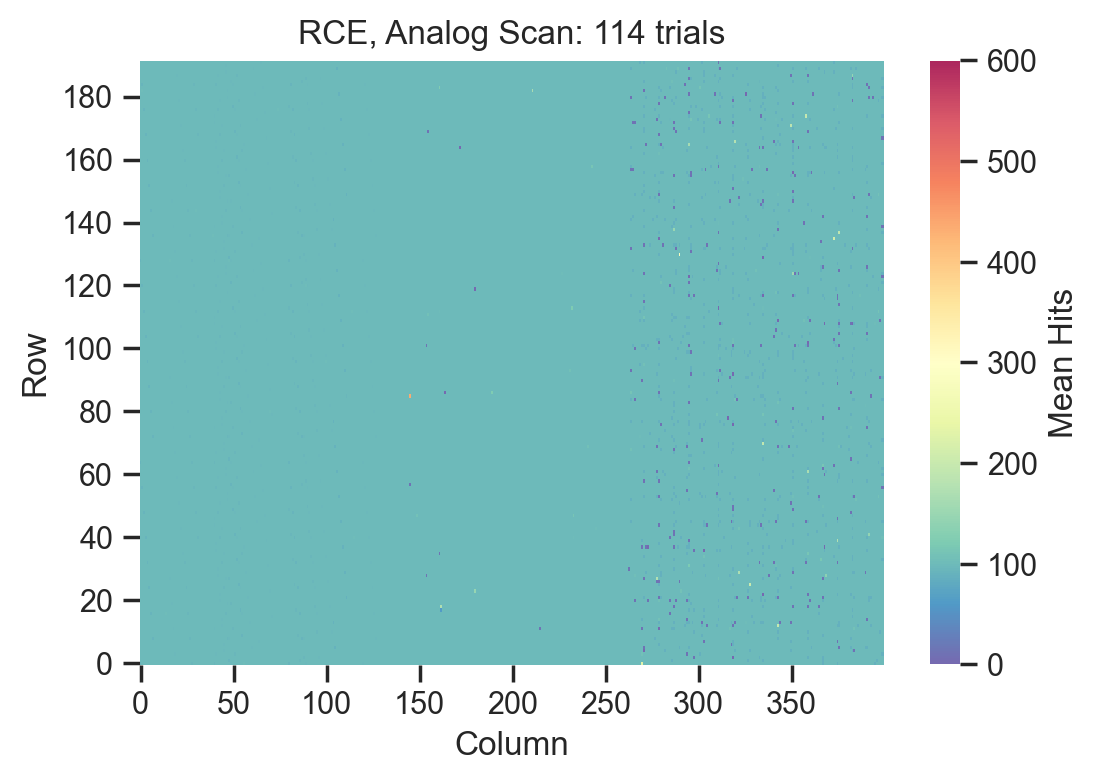

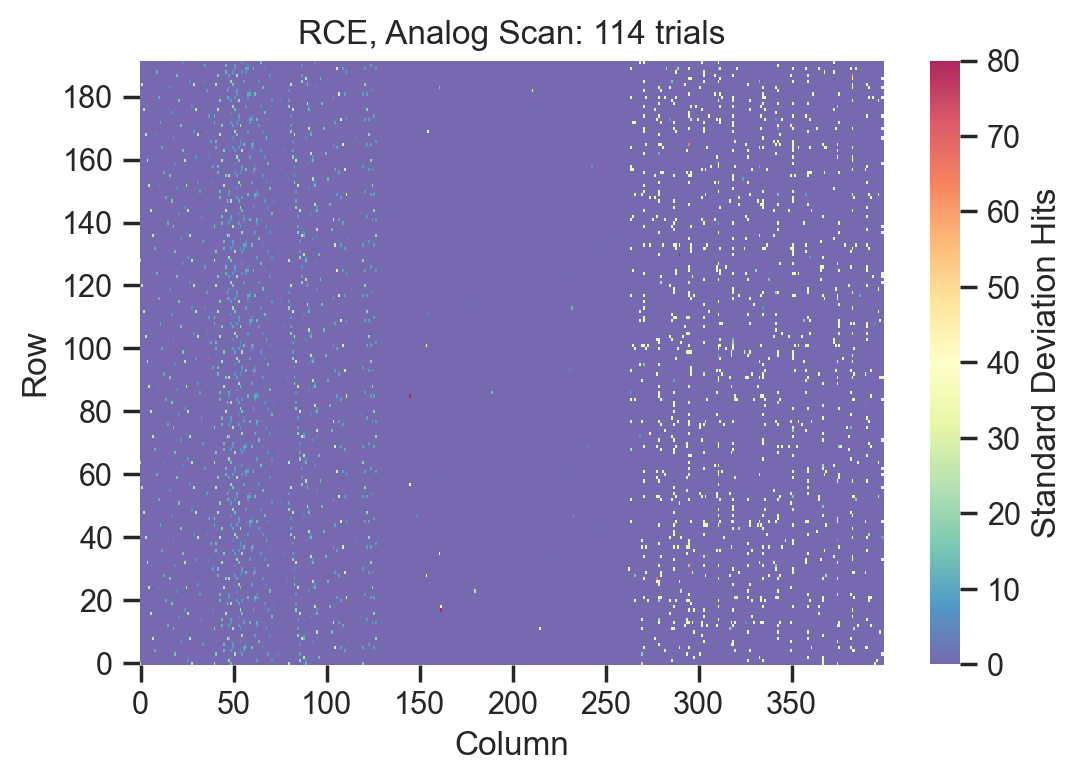

In [47]:
# Find the digital scans

# Read RCE scans

readout = "RCE"
file = 'JohnDoe_0_OccupancyMap.dat'

#scan_type = "std_digitalscan"
#scan_name = "Digital Scan"
scan_type = "std_analogscan"
scan_name = "Analog Scan"

save_name = "rce"
if scan_type == "std_analogscan":
    save_name += "_analog"
else:
    save_name += "_digital"

#my_files = glob.glob('../data/rce_test_03_25_20/*'+scan_type+'/'+file)
my_files = glob.glob('../data/rce_test_04_15_20/*'+scan_type+'/'+file)

#print(sorted(my_files))
x, y = 400,192
z = len(my_files)
my_data = np.zeros((x,y,z))

i = 0 
for my_file in sorted(my_files):         
    my_data[:,:,i] = read_dat(my_file)
    if i == 0: 
        plot_occupancy_map(my_data[:,:,i],title=readout+", "+scan_name+", "+"Single Trial")
        plt.savefig("plots/"+save_name+"_1_occ.pdf")
        
    i += 1
    
rce_title = readout+","+" "+scan_name+": "+str(len(my_files))+" trials"
# Plot average
rce_avg_data = np.mean(my_data,axis=2)
plot_occupancy_map(rce_avg_data,title= rce_title,cbar_title="Mean") 
plt.savefig("plots/"+save_name+"_mean_occ.png")

# Plot std deviation 
rce_std_data = np.std(my_data,axis=2)
plot_occupancy_map(rce_std_data,title = rce_title,cbar_title="Standard Deviation") 
plt.savefig("plots/"+save_name+"_std_occ.png")


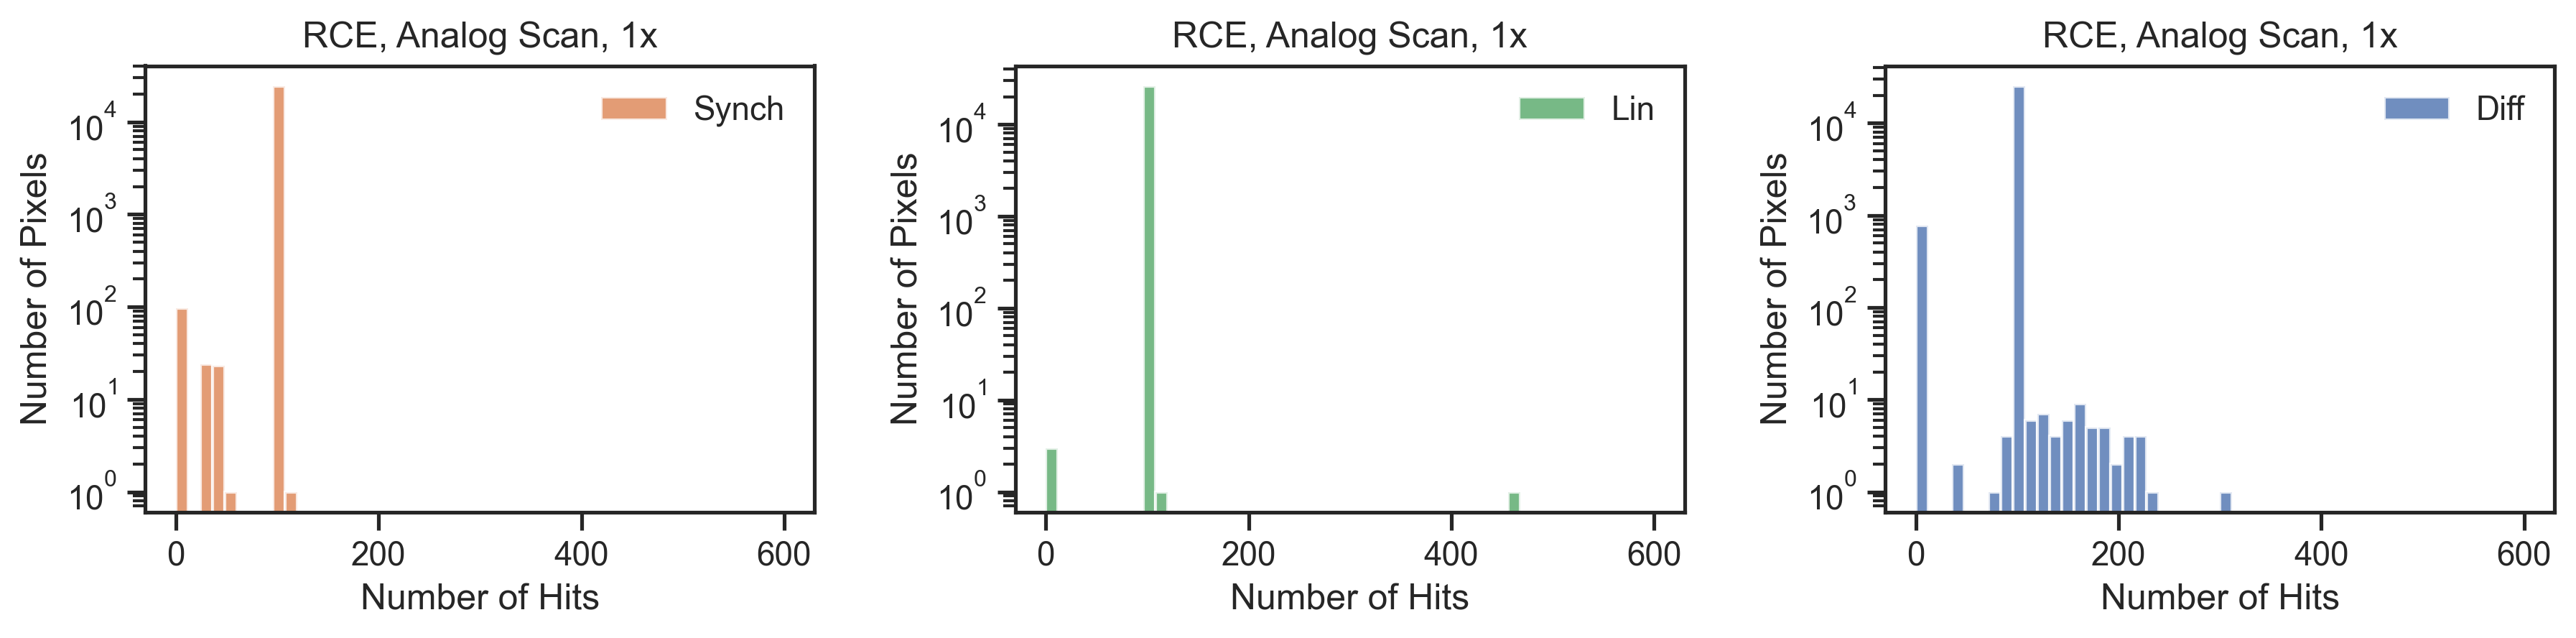

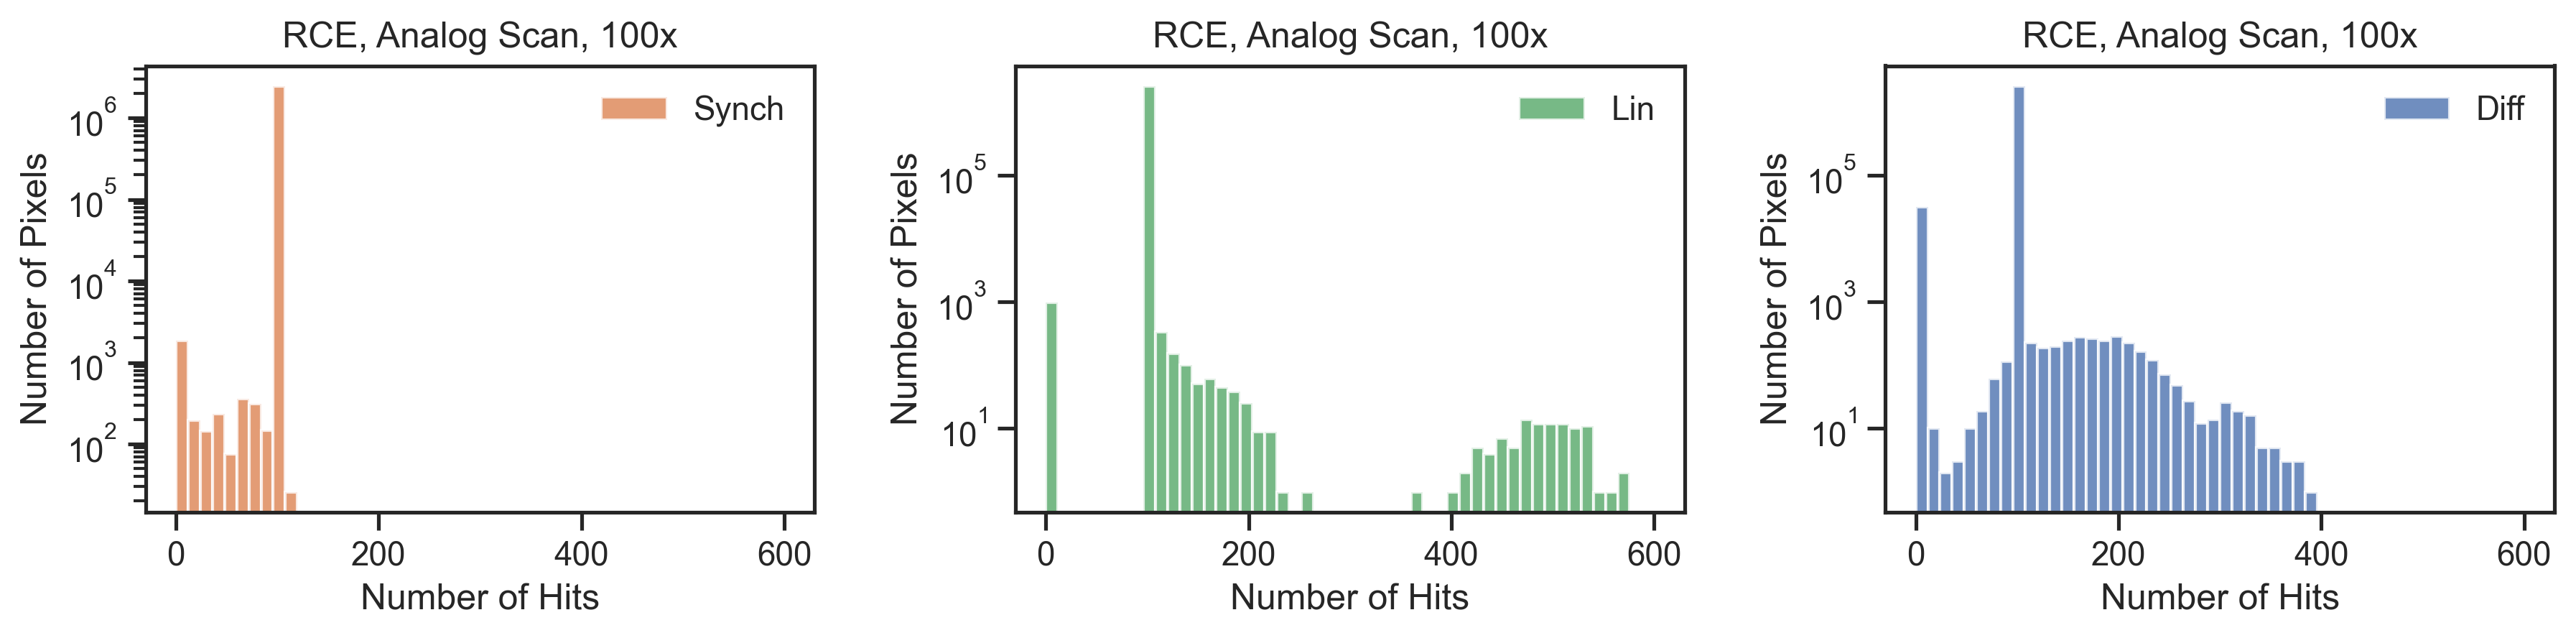

In [17]:
plot_hists_by_fe(my_data, readout, scan_name,n_repeat=1)
plt.savefig("plots/"save_name+"_1_hists.pdf")

plot_hists_by_fe(my_data, readout, scan_name,n_repeat=100)
plt.savefig("plots/"save_name+"_100_hists.pdf")

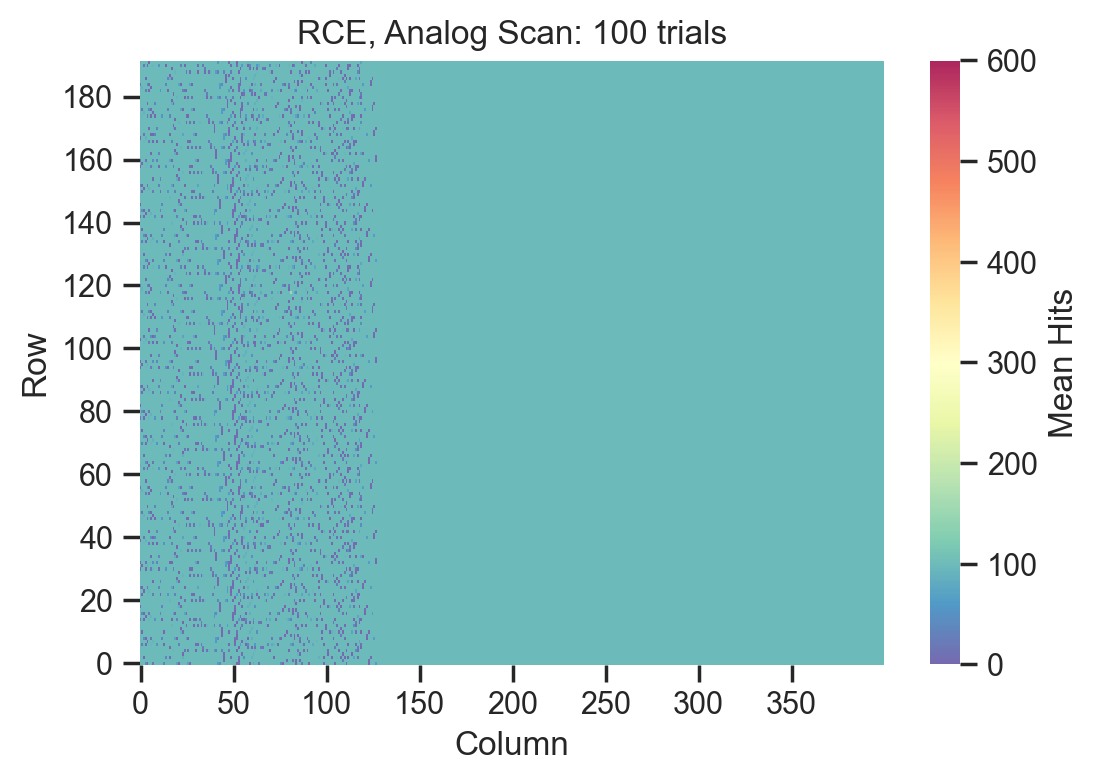

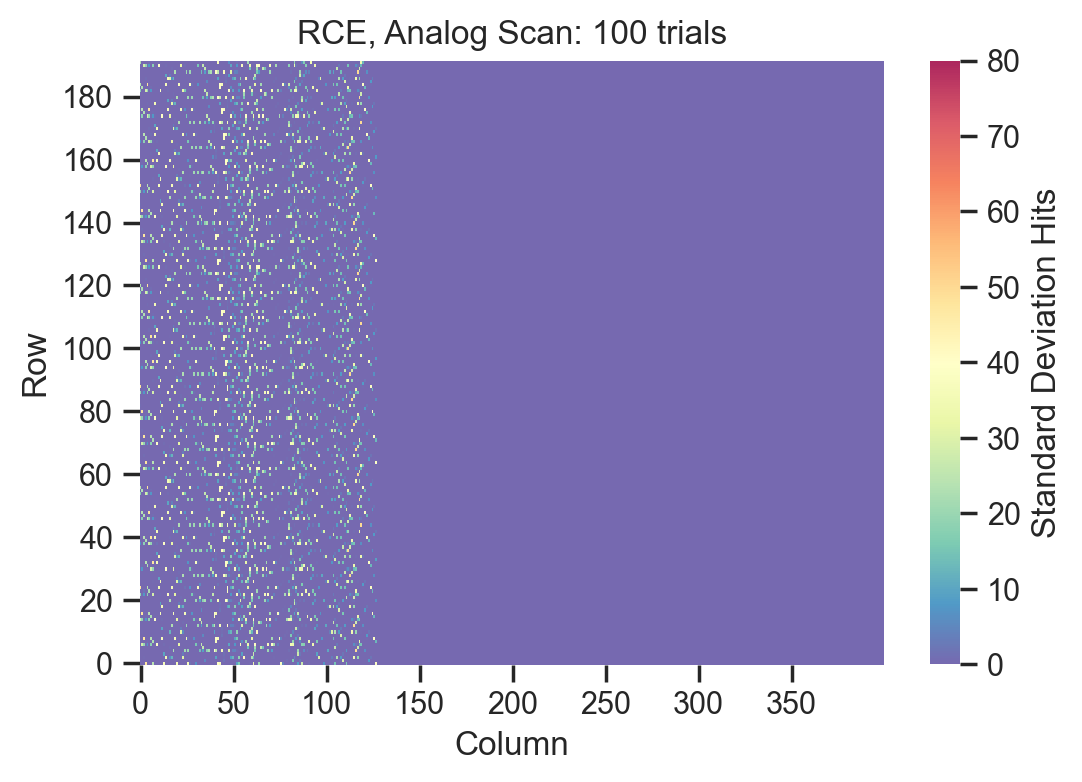

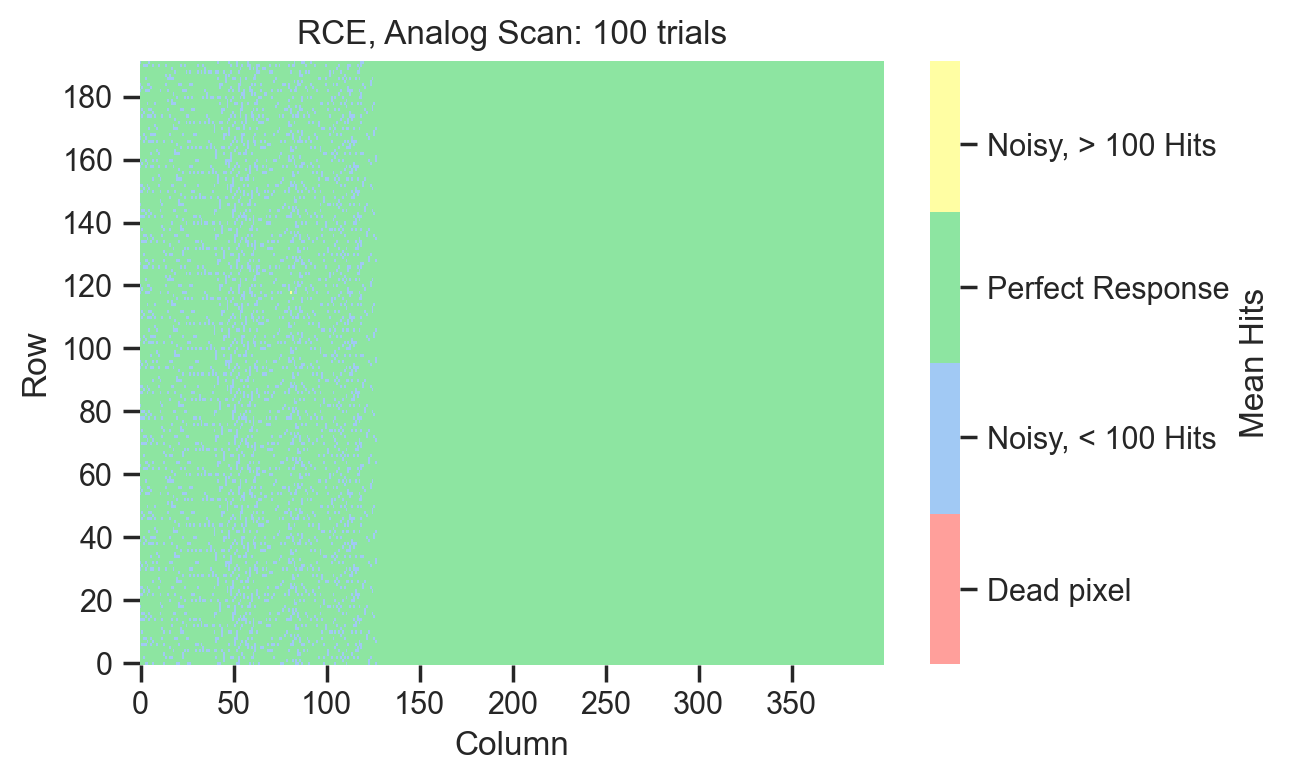

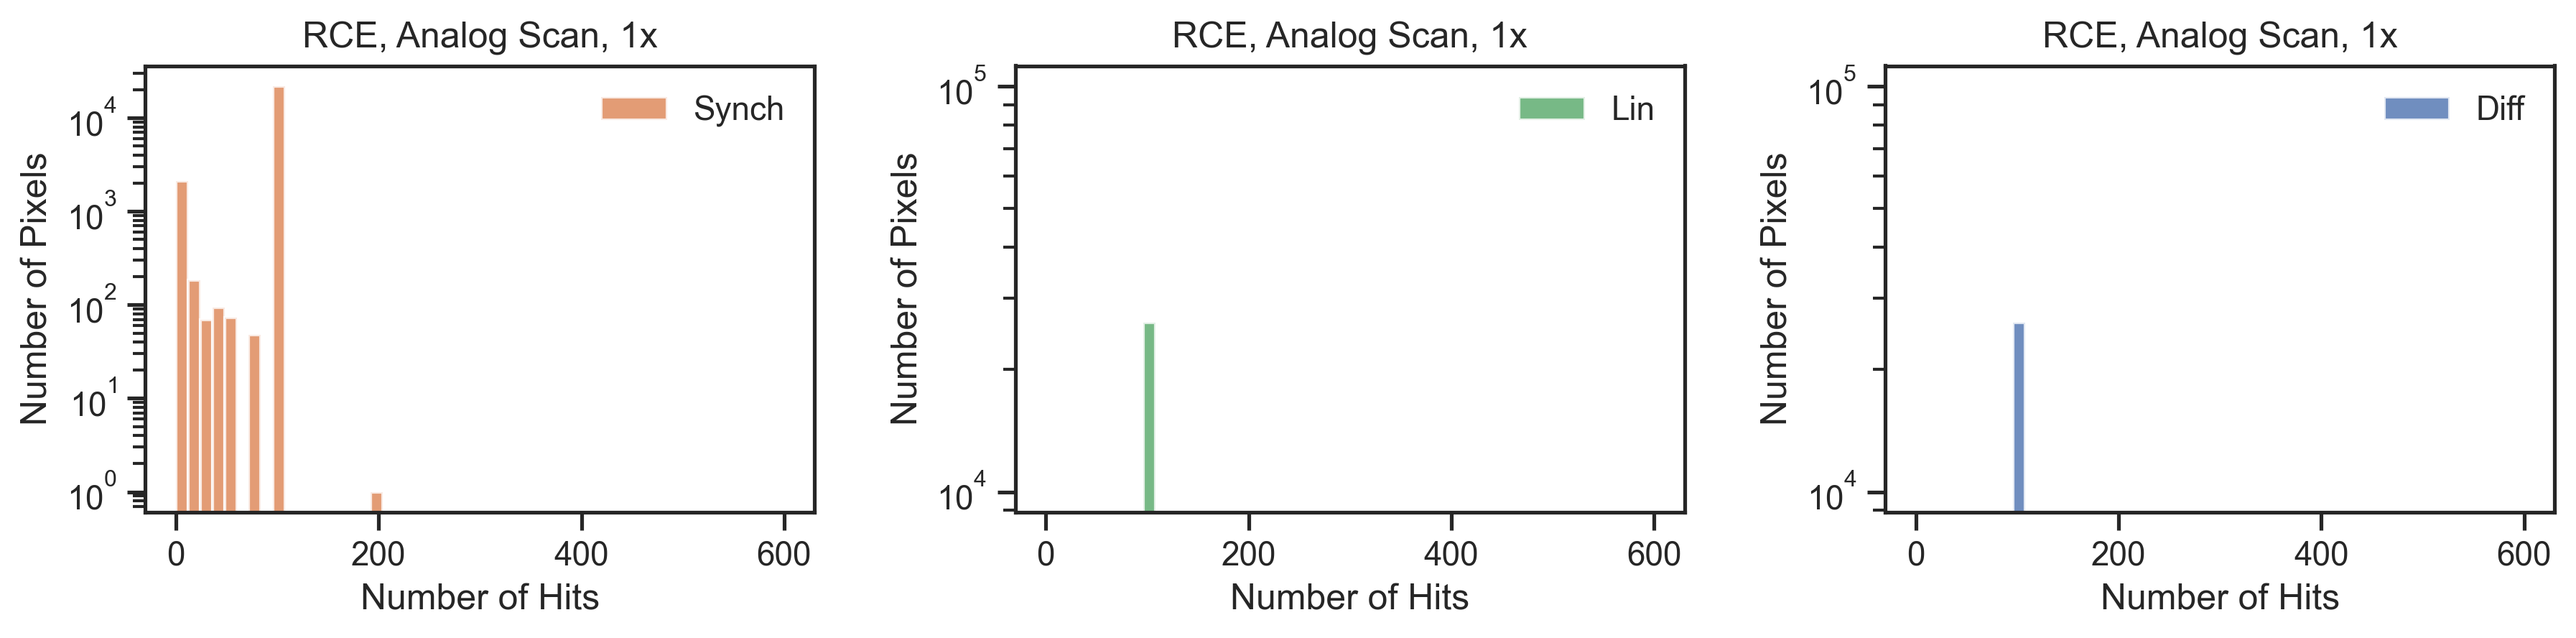

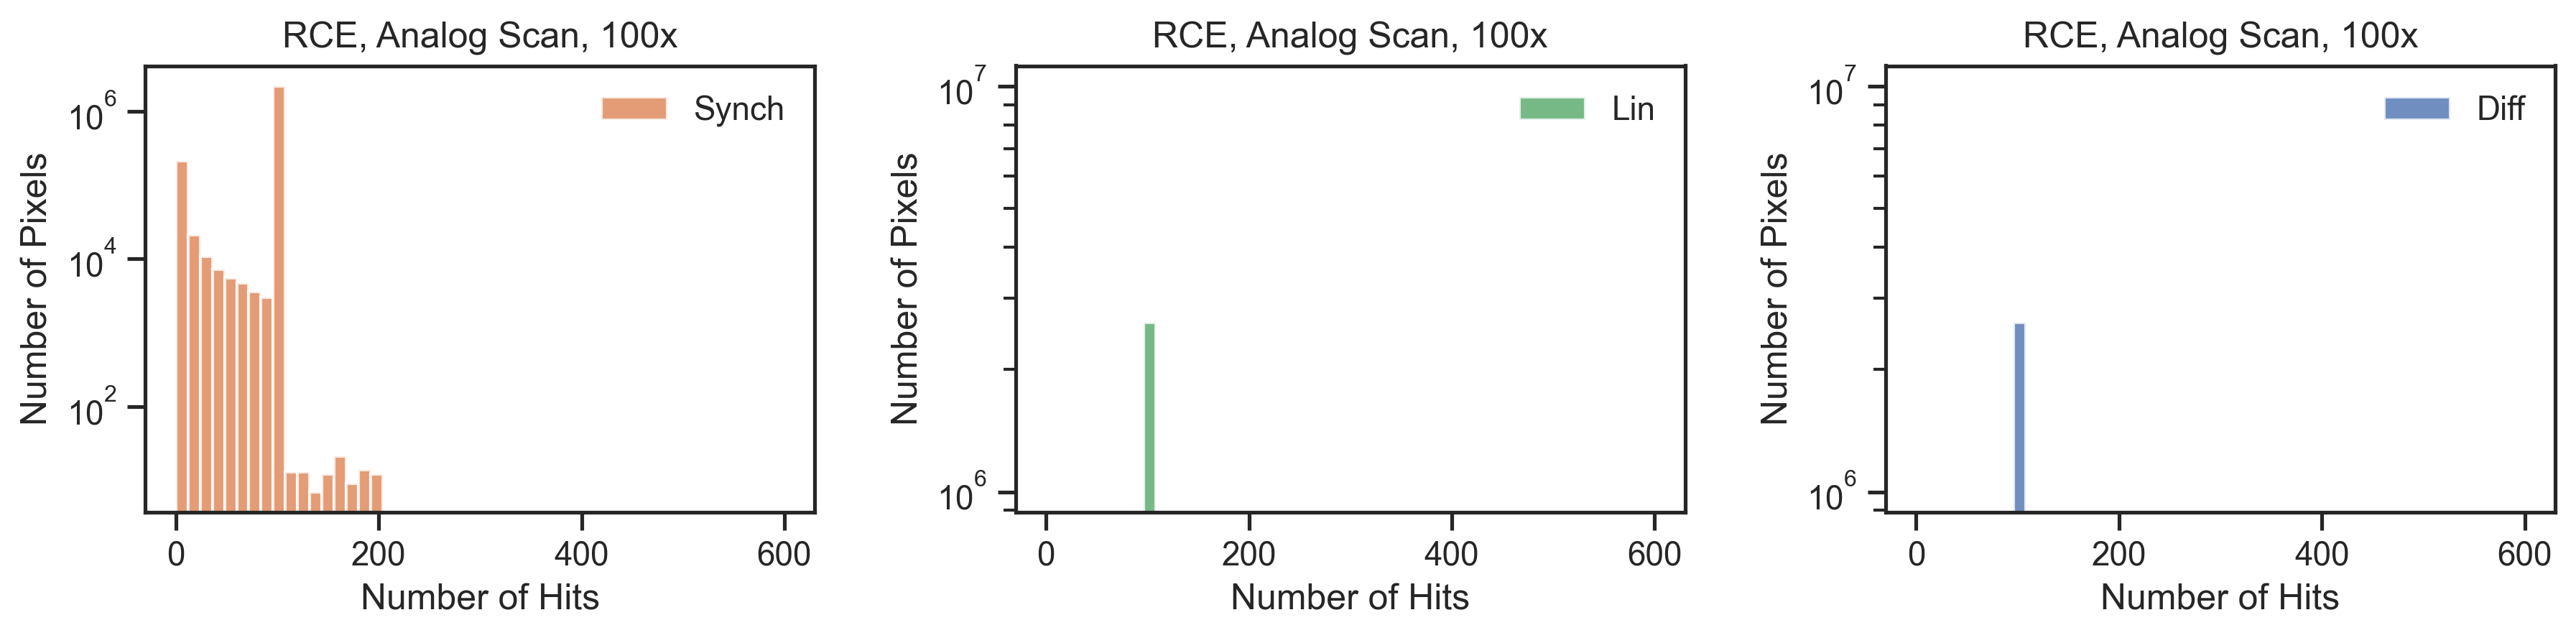

In [64]:
# Read new RCE

# Find the digital scans

# Read RCE scans

readout = "RCE"
file = 'JohnDoe_0_OccupancyMap.json'

#scan_type = "std_digitalscan"
#scan_name = "Digital Scan"
scan_type = "fast_std_analogscan"
scan_name = "Analog Scan"

save_name = "rce"
if scan_type == "fast_std_analogscan":
    save_name += "_analog"
else:
    save_name += "_digital"

#my_files = glob.glob('../data/rce_test_03_25_20/*'+scan_type+'/'+file)
my_files = glob.glob('../data/rce_test_05_06_20/*'+scan_type+'/'+file)


#print(sorted(my_files))
x, y = 400,192
z = len(my_files)
my_data = np.zeros((x,y,z))

i=0
for my_file in sorted(my_files): 
    with open(my_file) as f:
        my_json = json.load(f) # Open json
        my_data[:,:,i] = np.array(my_json['Data'])
        #plot_occupancy_map(my_json["Data"])
        
    i += 1

#i = 0 
#for my_file in sorted(my_files):         
#    my_data[:,:,i] = read_dat(my_file)
#    if i == 0: 
#        plot_occupancy_map(my_data[:,:,i],title=readout+", "+scan_name+", "+"Single Trial")
#        plt.savefig(save_name+"_1_occ.pdf")
#        
#    i += 1
    
rce_title = readout+","+" "+scan_name+": "+str(len(my_files))+" trials"
# Plot average
rce_avg_data = np.mean(my_data,axis=2)
plot_occupancy_map(rce_avg_data,title= rce_title,cbar_title="Mean") 
plt.savefig("plots/"+save_name+"_mean_occ.png")

# Plot std deviation 
rce_std_data = np.std(my_data,axis=2)
plot_occupancy_map(rce_std_data,title = rce_title,cbar_title="Standard Deviation") 
plt.savefig("plots/"+save_name+"_std_occ.png")

# Plot segmented 
plot_classified_occupancy_map(rce_avg_data,title= rce_title,cbar_title="Mean") 
plt.savefig("plots/"+save_name+"_mean_segmented_occ.png")

plot_hists_by_fe(my_data, readout, scan_name,n_repeat=1)
plt.savefig("plots/"+save_name+"_1_hists.pdf")

plot_hists_by_fe(my_data, readout, scan_name,n_repeat=100)
plt.savefig("plots/"+save_name+"_100_hists.pdf")


In [73]:
my_data[0:128,:,0]
#my_data[128:264,:,0]

array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])

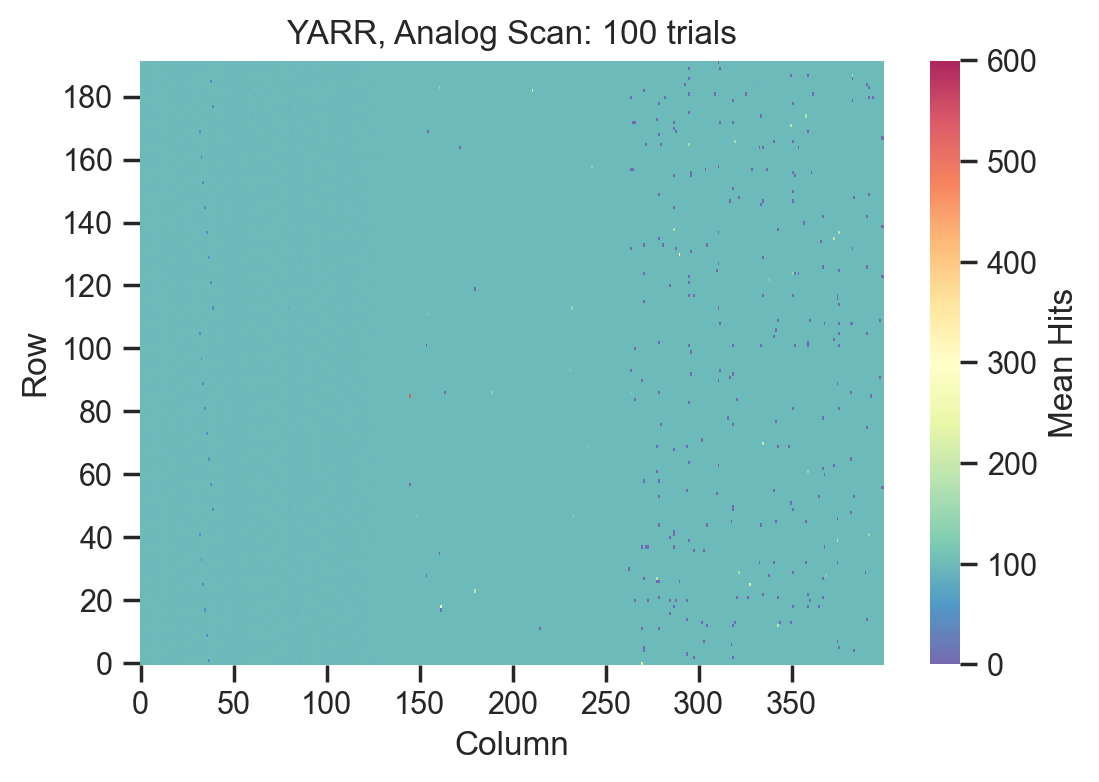

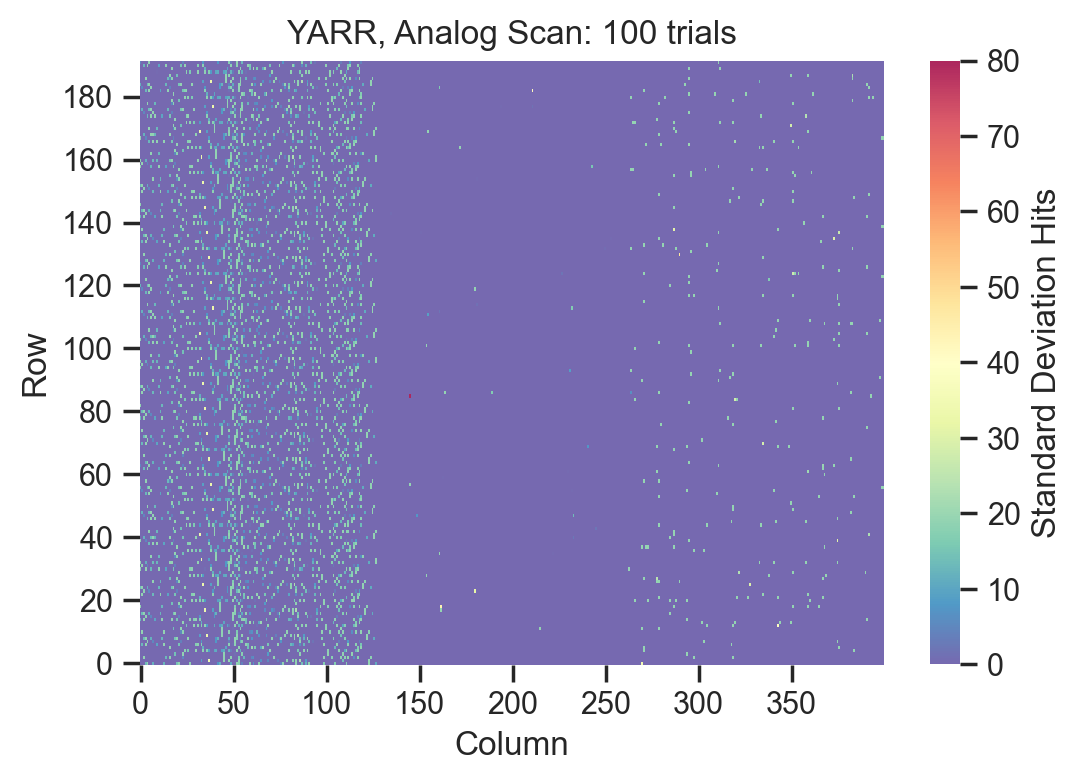

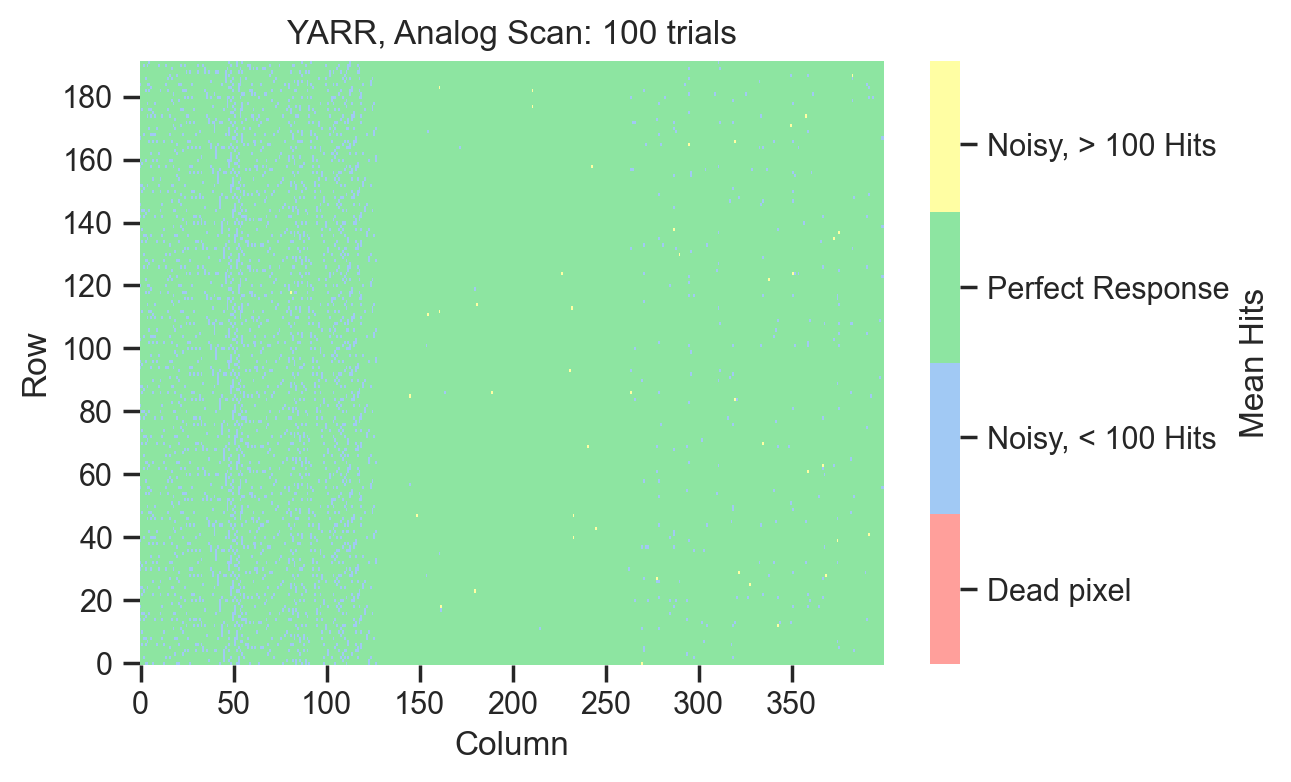

In [59]:
readout = "YARR"
file = 'JohnDoe_0_OccupancyMap.json'

#scan_type = "std_digitalscan"
#scan_name = "Digital Scan"
scan_type = "std_analogscan"
scan_name = "Analog Scan"

save_name = "yarr"
if scan_type == "std_analogscan":
    save_name += "_analog"
else:
    save_name += "_digital"

#my_files = glob.glob('../data/yarr_test_03_25_20/*_'+scan_type+'/'+file)
my_files = glob.glob('../data/yarr_test_04_15_20/*_'+scan_type+'/'+file)
    
#print(my_files)
i = 0 
for my_file in sorted(my_files): 
    with open(my_file) as f:
        my_json = json.load(f) # Open json
        my_data[:,:,i] = np.array(my_json['Data'])
        #plot_occupancy_map(my_json["Data"])
        
    i += 1
    
yarr_title = readout+","+" "+scan_name+": "+str(len(my_files))+" trials"
# Plot average
yarr_avg_data = np.mean(my_data,axis=2)
plot_occupancy_map(yarr_avg_data,title= yarr_title,cbar_title="Mean") 
plt.savefig("plots/"+save_name+"_mean_occ.png")

# Plot std deviation 
yarr_std_data = np.std(my_data,axis=2)
plot_occupancy_map(yarr_std_data,title = yarr_title,cbar_title="Standard Deviation") 
plt.savefig("plots/"+save_name+"_std_occ.png")

# Plot segmented 
yarr_avg_data = np.mean(my_data,axis=2)
plot_classified_occupancy_map(yarr_avg_data,title= yarr_title,cbar_title="Mean") 
plt.savefig("plots/"+save_name+"_mean_segmented_occ.png")



In [ ]:
my_data

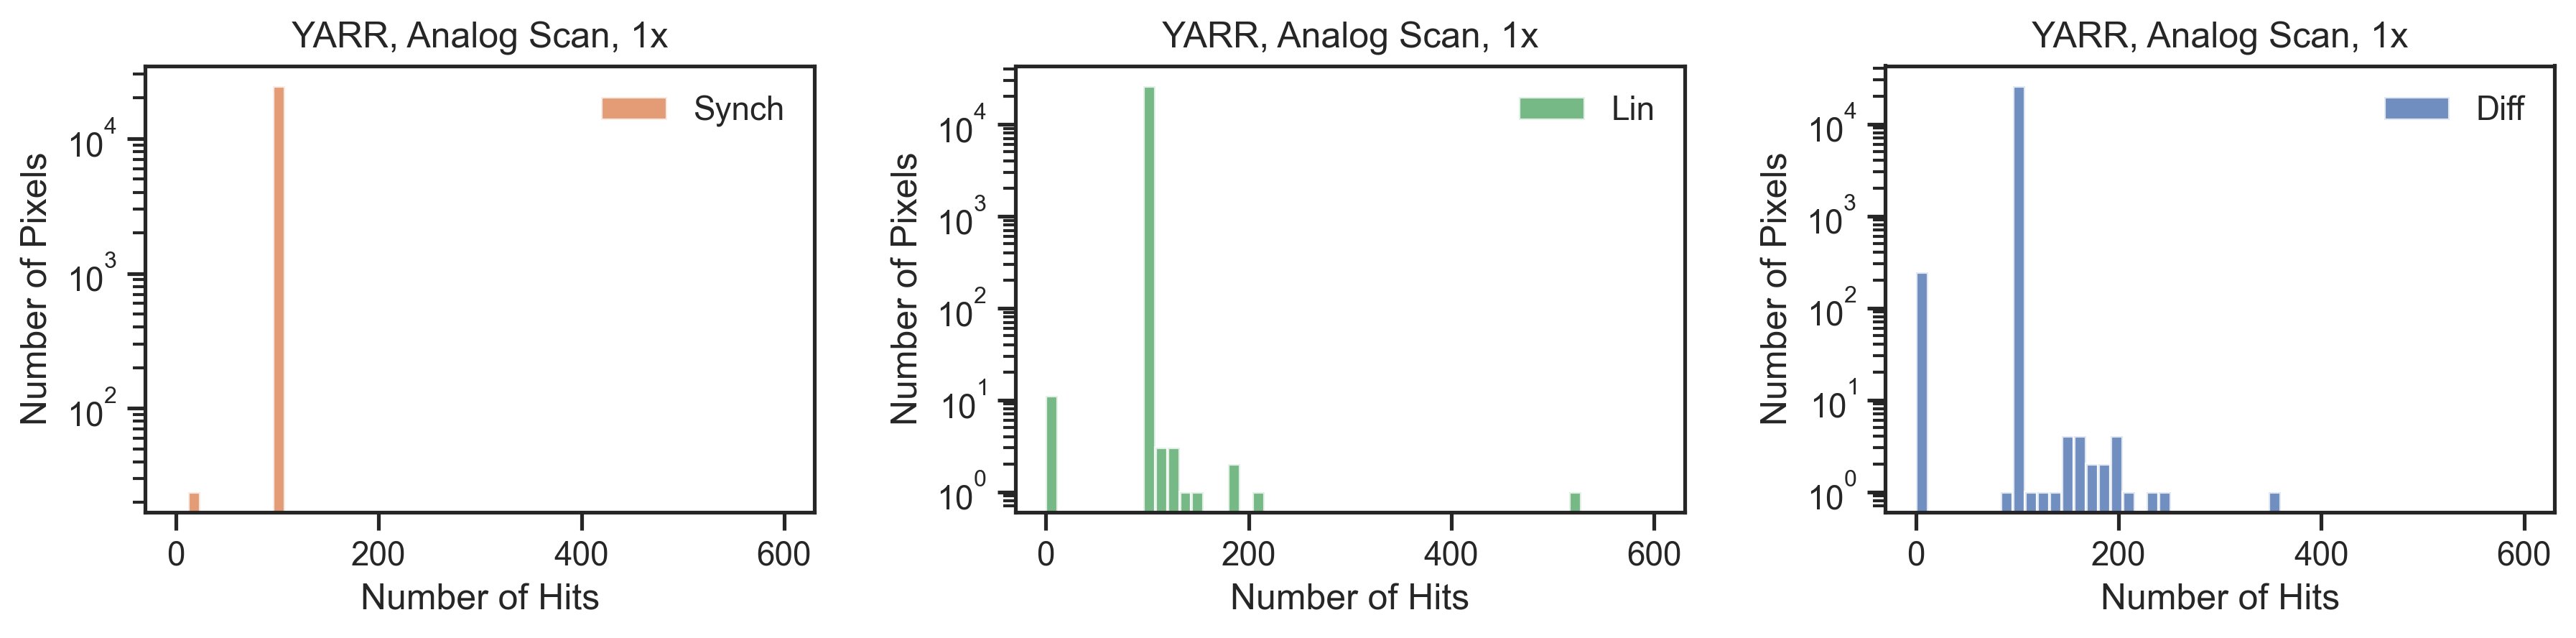

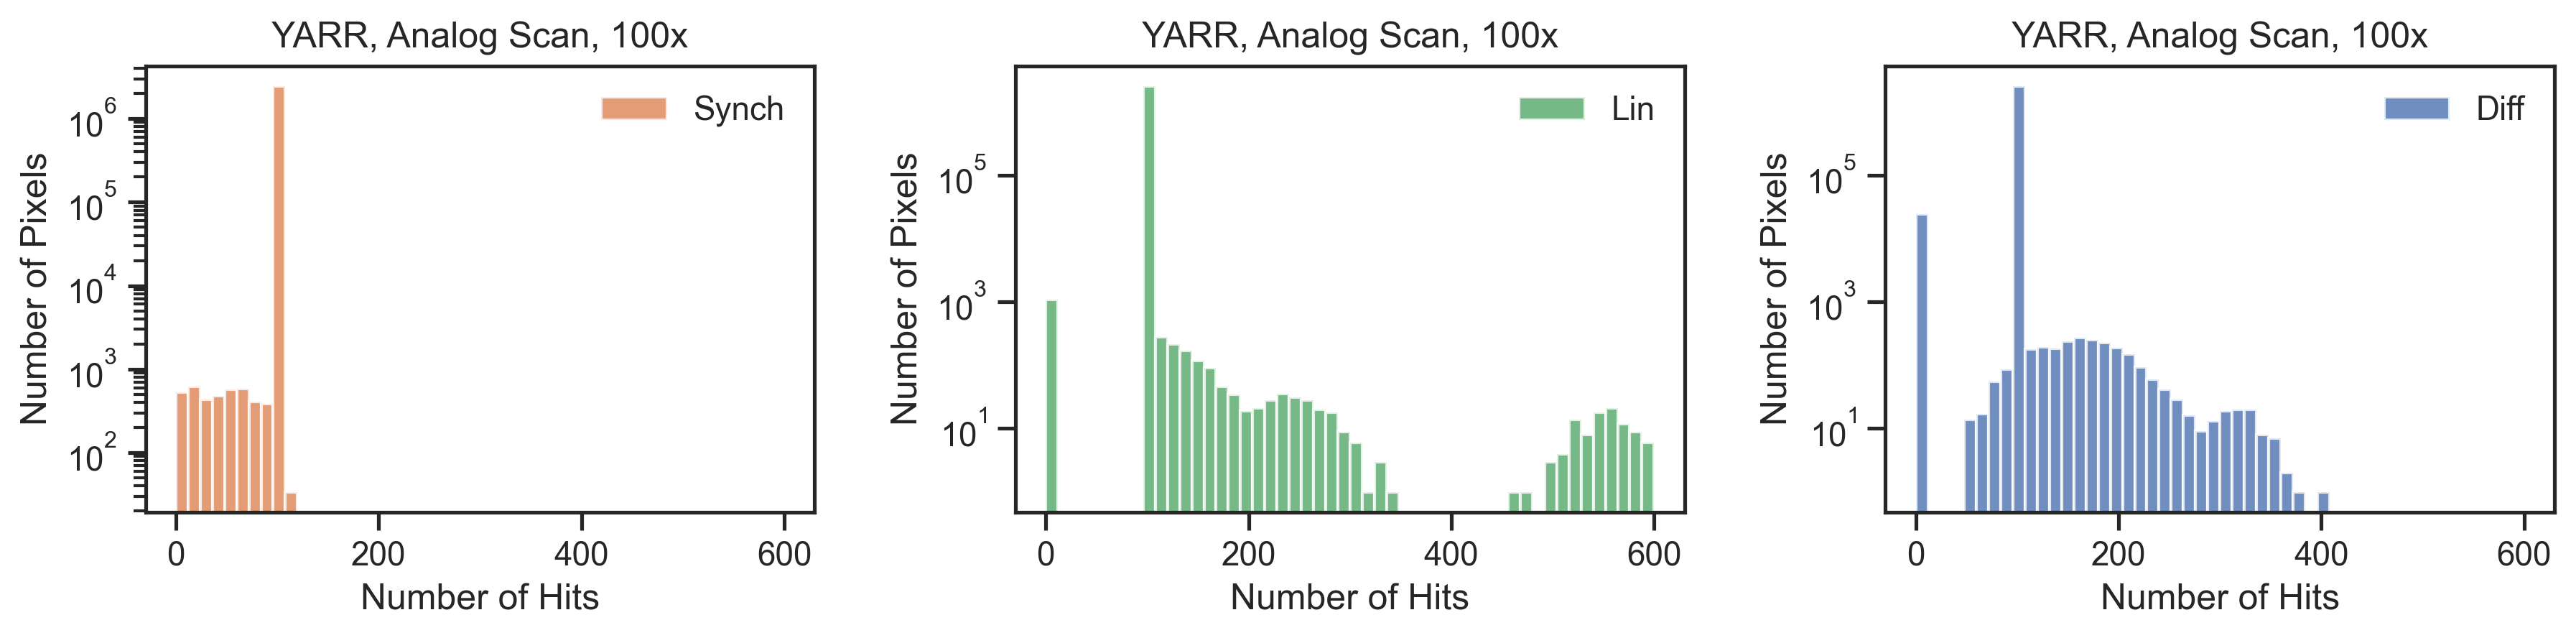

In [19]:
plot_hists_by_fe(my_data, readout, scan_name,n_repeat=1)
plt.savefig("plots/"+save_name+"_1_hists.pdf")

plot_hists_by_fe(my_data, readout, scan_name,n_repeat=100)
plt.savefig("plots/"+save_name+"_100_hists.pdf")

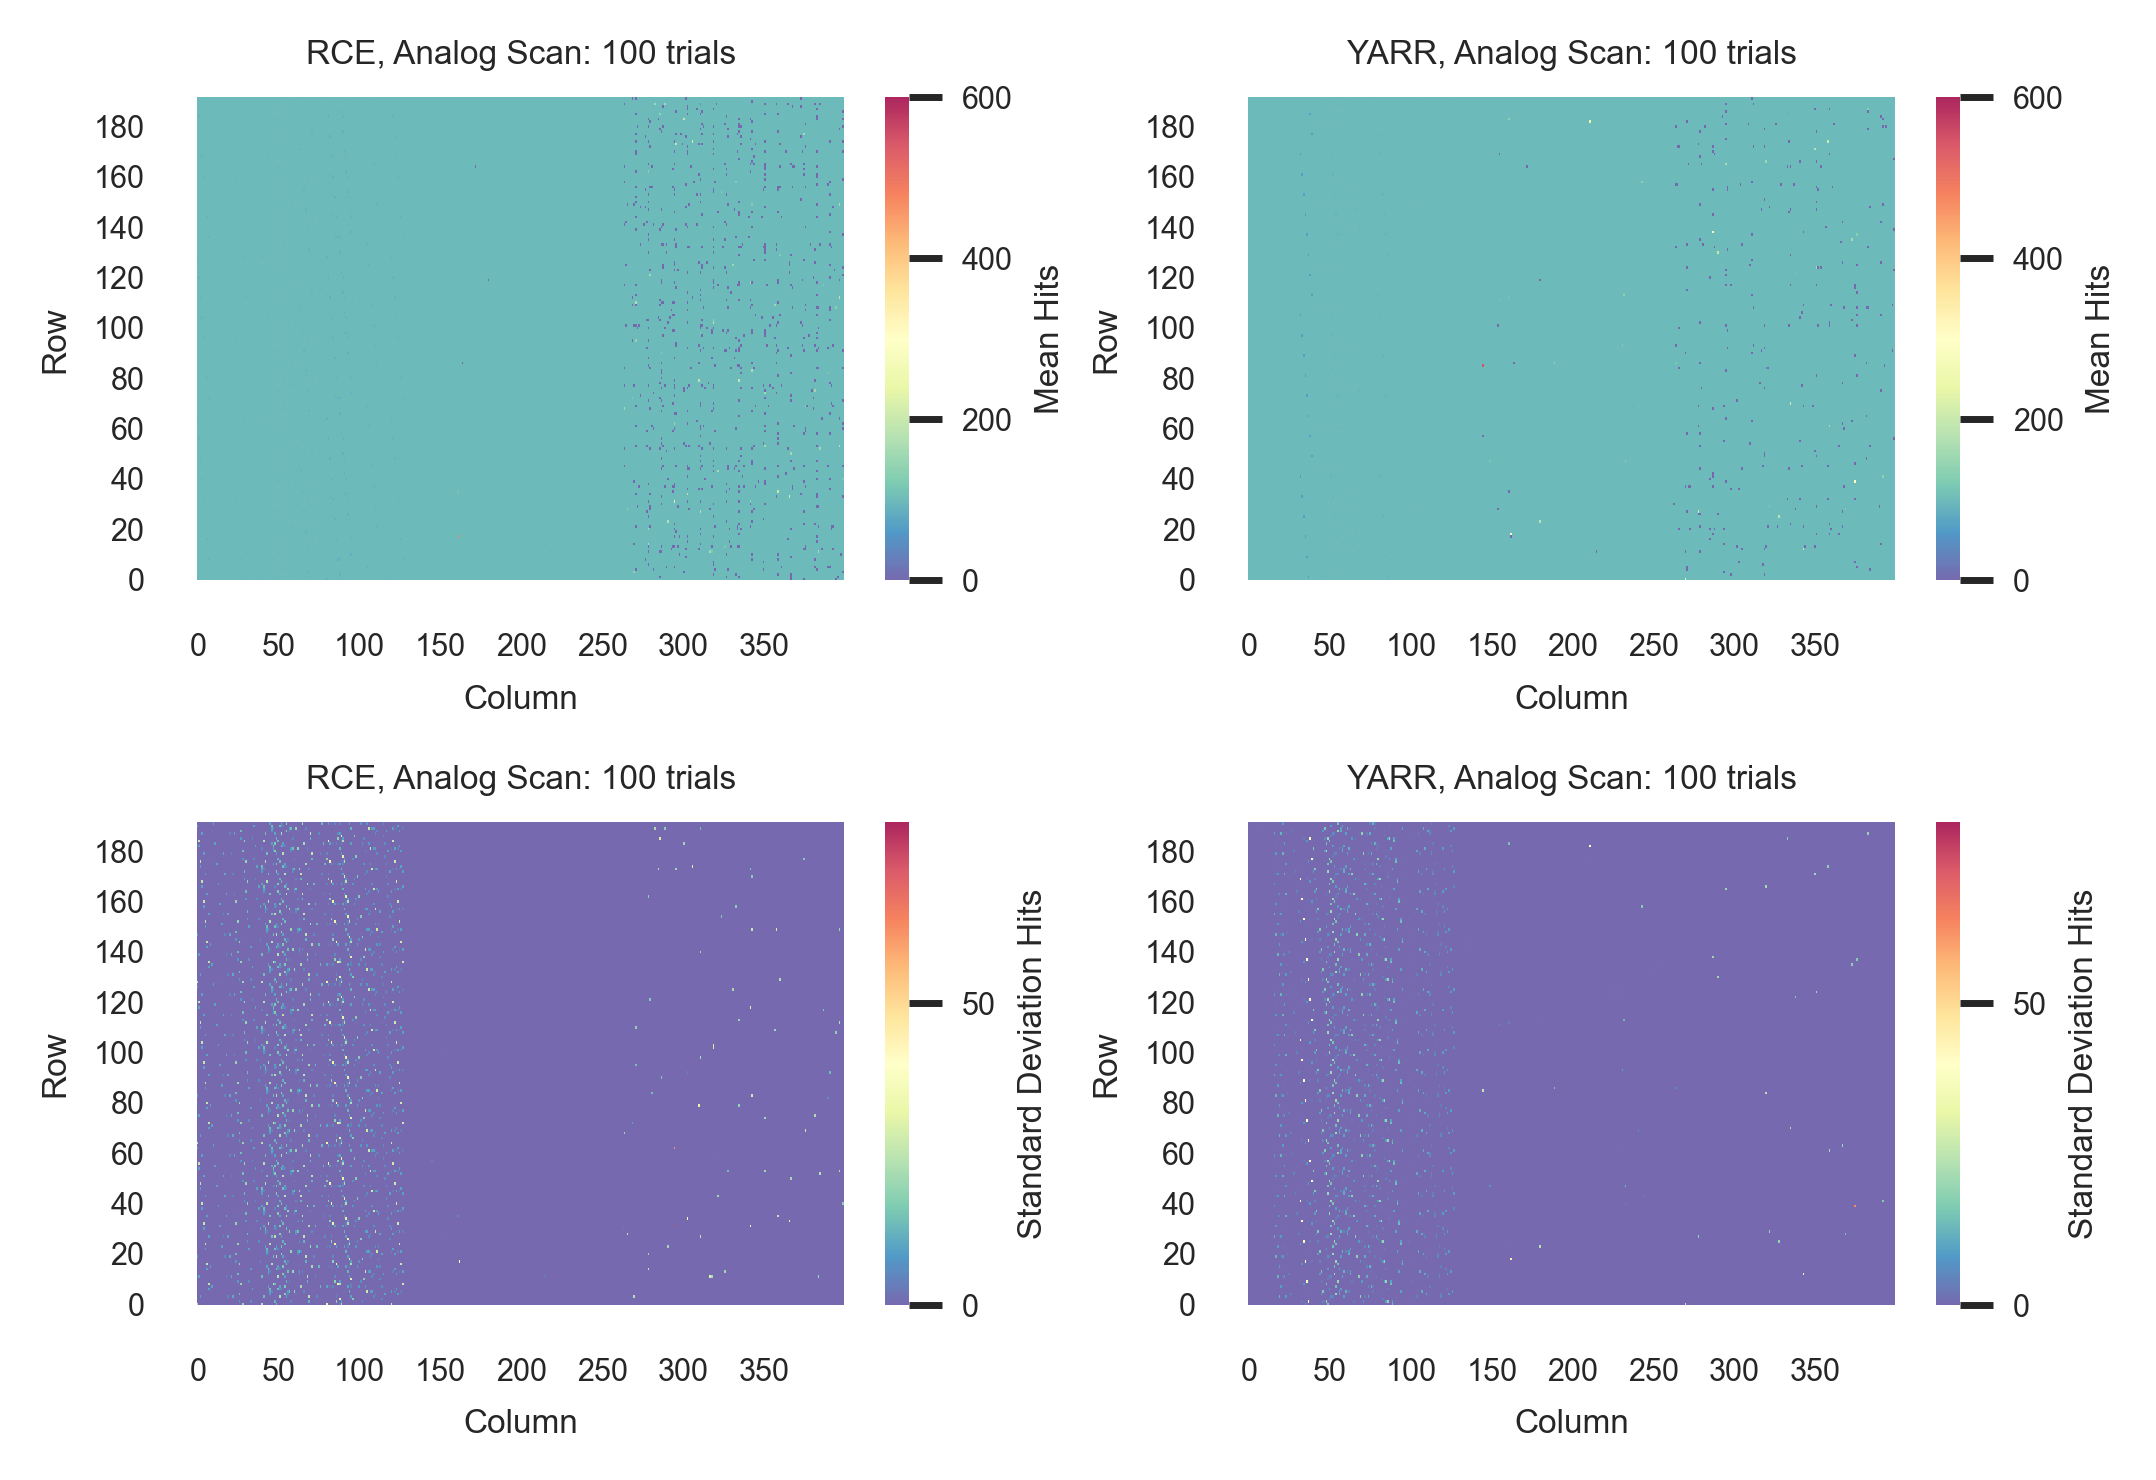

In [119]:
#%matplotlib notebook
#%matplotlib notebook

#plt.tight_layout()
sns.set(font_scale=0.5)
plt.figure(dpi=400)
plt.subplot(2,2,1)
plot_occupancy_map(rce_avg_data,title= rce_title,cbar_title="Mean",new_fig=False)
plt.subplot(2,2,3)
plot_occupancy_map(rce_std_data,title = rce_title,cbar_title="Standard Deviation",new_fig=False) 
plt.subplot(2,2,2)
plot_occupancy_map(yarr_avg_data,title= yarr_title,cbar_title="Mean",new_fig=False) 
plt.subplot(2,2,4)
plot_occupancy_map(yarr_std_data,title = yarr_title,cbar_title="Standard Deviation",new_fig=False)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.savefig("plots/comparison_rce_yarr_occ.png",format='png')
sns.set(font_scale=1)


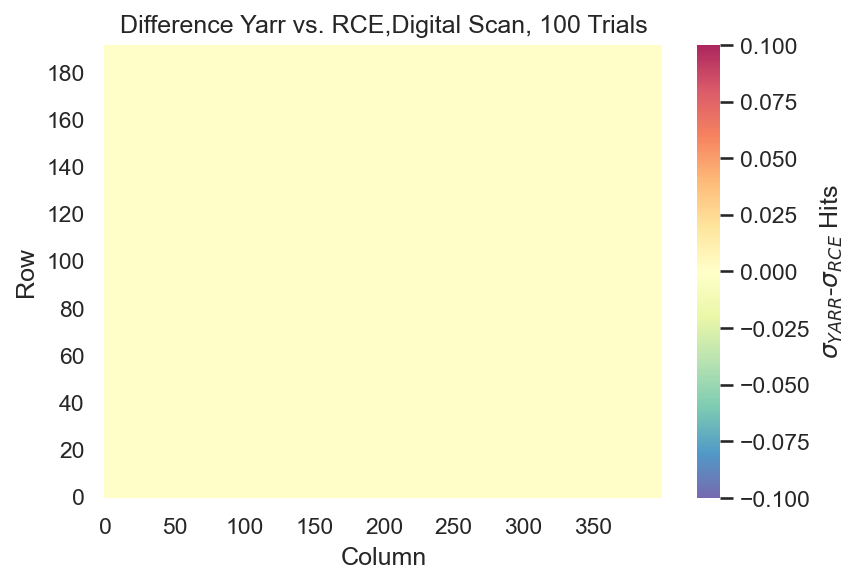

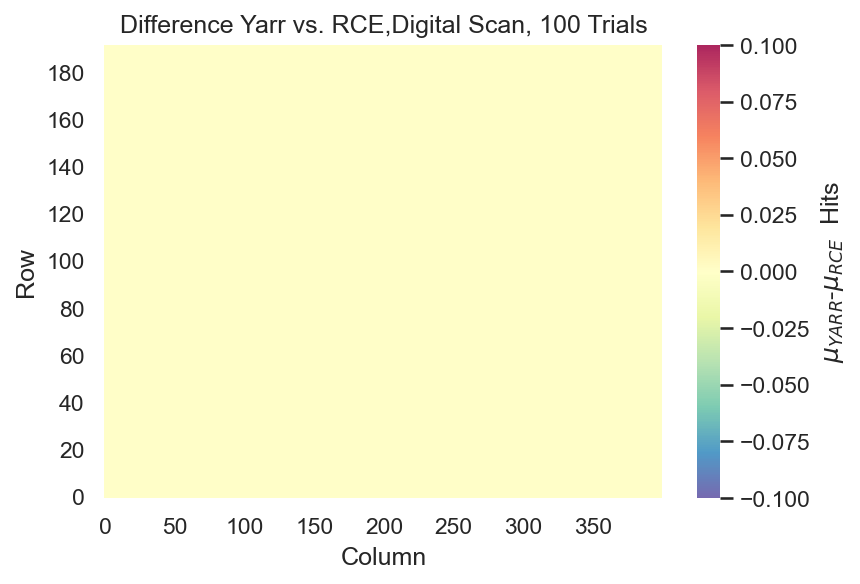

In [36]:
sns.set(font_scale=1)
diff_avg_data = yarr_avg_data-rce_avg_data
diff_std_data = yarr_std_data-rce_std_data

plot_occupancy_map(diff_std_data,title = "Difference Yarr vs. RCE,"+scan_name+", 100 Trials",cbar_title="$\sigma_{YARR}$-$\sigma_{RCE}$")
plot_occupancy_map(diff_avg_data,title = "Difference Yarr vs. RCE,"+scan_name+", 100 Trials",cbar_title="$\mu_{YARR}$-$\mu_{RCE}$ ")

In [114]:

#plot_occupancy_map(my_data[:,:,0:1].reshape(400,192),title = "Single Test",cbar_title="") 




